In [1]:
import json

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io as sio

# Importing data

This notebook shows how to import, format and save raw experimental data from different types of systems. This demo uses data acquired on the LRO_PFL6_slab sample which is a 2-layer phantom made from nylon and PDMS. Spectra were acquired with a point-probe system using *Timbyte* and a widefield Raman system. The point-probe data were saved in a .json file (`toy_data/demos/demo1_import/pfl6_slab.json`) and the widefield data in a collection of .tiff images (`toy_data/demos/demo1_import/pfl6_slab/posX.tiff`).

**Note** the pfl6_slab.json contains a high wave number (first one) and a fingerprint acquisition (second one).

## Importing data into python

There are several different ways to import the same type of data into python depending on the library chose. Here, we will focus on using **pandas** as a core tool (and default) for this. It is also useful to know how to use **numpy**, **json** when dealing with small or simple format data and **scipy.io** for **.mat** data. This table can be used as a quick cheatsheet for which library to use depending on the type of data;

| Libraries           | file type                                     | import function                                                                |
| ------------------- | --------------------------------------------- | ------------------------------------------------------------------------------ |
| `pandas`            | **.pkl**, .csv, .json, .xls                   | pandas.**read_pickle**(), pandas.**read_pickle**(), pandas.**read_csv**(), ... |
| `json`              | .json                                         | json.**load**()                                                                |
| `numpy`             | .txt, .csv                                    | numpy.**genfromtxt**()                                                         |
| `scipy.io`          | **.mat**                                      | sio.**loadmat**()                                                              |
| `matplotlib.pyplot` | .png, .tiff, (any image file with **pillow**) | matplotlib.pyplot.**imread**()                                                 |




### Importing .json files

The easiest way to import .json files is to use the `pandas` library. 

In [2]:
df = pd.read_json('data/pfl6_slab/pfl6_slab.json')
# df stands for DataFrame, though common way of naming it, I do advise using more explicit
# variable name. Since loading data in python is the focus here, I allow myself to use
# 'df' as a name instead of 'pfl6' or something better.

# Let's look at the loaded data
df

# for large dataframe, df.head() will print the first 5 rows and df.tail() the last 5.

TimeStamp              Comment  Wavelength  \
0  2019/11/8-12h29 29.763  middle, point blank         671   
1  2019/11/8-12h29 29.845  middle, point blank         785   

                                                 aec  \
0  {'enabled': True, 'startexp': 100, 'maxexp': 1...   
1  {'enabled': True, 'startexp': 100, 'maxexp': 1...   

                                                asnr  Power  ExpTime  \
0  {'enabled': False, 'nstart': 5, 'nmax': 50, 't...     10     1000   
1  {'enabled': False, 'nstart': 5, 'nmax': 50, 't...     26     1000   

   SpecPerAcqui  CamTemp         CamStab  \
0            10      -55  NOT STABILIZED   
1            10      -55  NOT STABILIZED   

                                          Background  \
0  [593, 566, 558, 585, 558, 591, 549, 575, 578, ...   
1  [562, 543, 584, 545, 553, 576, 542, 544, 556, ...   

                                          RawSpectra  
0  [[1252, 1233, 1330, 1475, 1490, 1505, 1549, 16...  
1  [[851, 916, 979, 1051, 1078, 1102, 1155, 1159,...

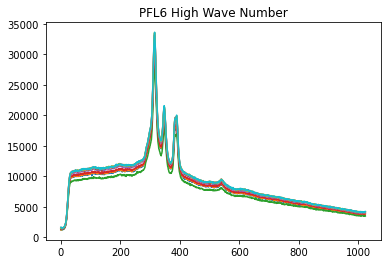

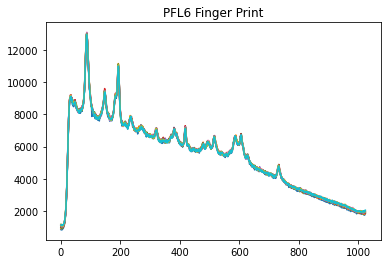

In [3]:
# Plotting RawSpectra
plt.figure()
plt.title('PFL6 High Wave Number')
plt.plot(df.RawSpectra[0]);
plt.figure()
plt.title('PFL6 Finger Print')
plt.plot(df.RawSpectra[1]);

The following code cell creates a numpy array that contains the pfl6 Fingerprint data and saves it as different files for the following importing examples.

In [4]:
# Creation of a (1024x10) array
spectrum_array = np.array(df.RawSpectra[1])

# Saving the array as .mat
sio.savemat('data/pfl6_slab/pfl6_slab.mat', {'spectrum_array':spectrum_array})

# Saving the array as .csv
np.savetxt('data/pfl6_slab/pfl6_slab.csv', spectrum_array, delimiter=',')
# This is a HORRIBLE WAY of saving data, since there are NO HEADERS in the created .csv file it is
# impossible to make sense of the saved data. NEVER DO THIS!!!

### Importing .mat files

This can be done using `scipy.io.loadmat`. Note that this will **not work** if the .mat contains certain types of datatypes such as Matlab 'tables'. It works best on simple array-like data.

In [5]:
# loading the .mat
loaded_mat = sio.loadmat('data/pfl6_slab/pfl6_slab.mat')

# This loads the .mat as a dictionary with the following keys 
print(loaded_mat.keys())

dict_keys(['__header__', '__version__', '__globals__', 'spectrum_array'])


In [6]:
# Our actual data is the 'spectrum_array' field
sarray = loaded_mat['spectrum_array']
sarray

array([[ 851,  916,  979, ..., 1159, 1182, 1135],
       [ 831,  949,  993, ..., 1099, 1150, 1154],
       [ 837,  944, 1011, ..., 1070, 1057, 1139],
       ...,
       [1755, 1815, 1900, ..., 1942, 2016, 1964],
       [1798, 1831, 1868, ..., 1972, 1956, 1971],
       [1829, 1853, 1894, ..., 2010, 1969, 2058]])

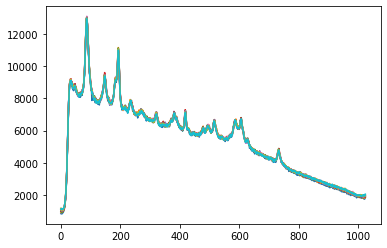

In [7]:
# Plotting it
plt.plot(sarray);

### Loading .txt of .csv files

If data is recorded in a readable txt file, there are **a lot** of ways to read it. I suggest to use either **numpy** or **pandas** depending on the size/complexity of the data.

- **numpy** for small/simple data | ie array saved as plain txt
- **pandas** for large/complex data | ie .csv with column headers and metadata

Here I show loading the simple spectrum_array saved earlier in `'toy_data/demos/demo1_import/pfl6_slab.csv'`. Note that there is no formatting for this data and no meta-information regarding what it is... you should **NEVER** do this. I **only** did this because the focus here is not the data itself... and as an example of what to **NEVER** do.

In [8]:
# loading txt data with numpy
sarray = np.genfromtxt('data/pfl6_slab/pfl6_slab.csv', delimiter=',')
# note that you need to specify the delimiter for this to work. I advise you use ',' when saving data.
sarray

array([[ 851.,  916.,  979., ..., 1159., 1182., 1135.],
       [ 831.,  949.,  993., ..., 1099., 1150., 1154.],
       [ 837.,  944., 1011., ..., 1070., 1057., 1139.],
       ...,
       [1755., 1815., 1900., ..., 1942., 2016., 1964.],
       [1798., 1831., 1868., ..., 1972., 1956., 1971.],
       [1829., 1853., 1894., ..., 2010., 1969., 2058.]])

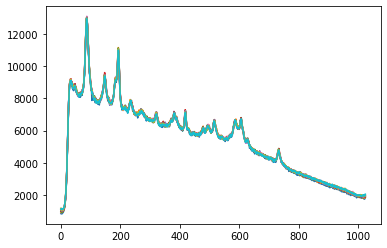

In [9]:
# Plotting it
plt.plot(sarray);

### Importing image data

Images can be imported into numpy arrays easily with `matplotlib.pyplot.imread()`.

**NOTE** you will need to install **pillow** to import types of images other than .png

`pip install pillow`

In [10]:
# reading a simple 2d image into an array
im2d = plt.imread('data/pfl6_slab/pfl6_slab/pos1.tiff')
im2d

array([[345, 337, 351, ..., 526, 538, 514],
       [354, 348, 354, ..., 554, 556, 552],
       [354, 349, 359, ..., 568, 584, 566],
       ...,
       [337, 335, 333, ..., 477, 470, 472],
       [334, 325, 339, ..., 414, 399, 414],
       [335, 330, 332, ..., 326, 320, 316]], dtype=uint16)

(-0.5, 340.5, 41.5, -0.5)

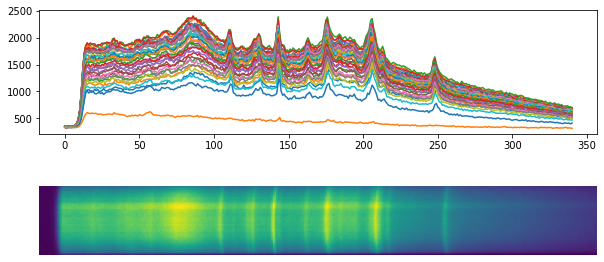

In [11]:
# 2 ways to look at the data

# 1. conventional spectrum plot
plt.figure(figsize=[10, 5])
plt.subplot(2,1,1)
plt.plot(im2d.transpose());
# 2. using imshow
plt.subplot(2,1,2)
plt.imshow(im2d)
plt.axis('off')

There are many ways of creating an hyperspectral data cube. This is an easy one that can be used when a good file naming convention is used (as is the case here).

In [12]:
# reading an hyperspectral cube
im3d = [] # creates an empty list that will contain all 2d images
for i in range(40):
    # read the ith image
    im2d = plt.imread('data/pfl6_slab/pfl6_slab/pos{}.tiff'.format(i+1)) 
    im3d.append(im2d) # append to im3d
    
im3d = np.stack(im3d) # converts im3d from a list of 2d images to a 3d cube array

# Let's look at im3d's shape
im3d.shape

(40, 42, 341)